KD Method  ACC Mean  ECE Mean  Normalized Harmonic Score
       AT 37.626719  0.163025                   0.527353
      CRD 41.445312  0.175580                   0.569453
      RKD 37.572500  0.162158                   0.520046
      VKD 37.545313  0.162195                   0.532366


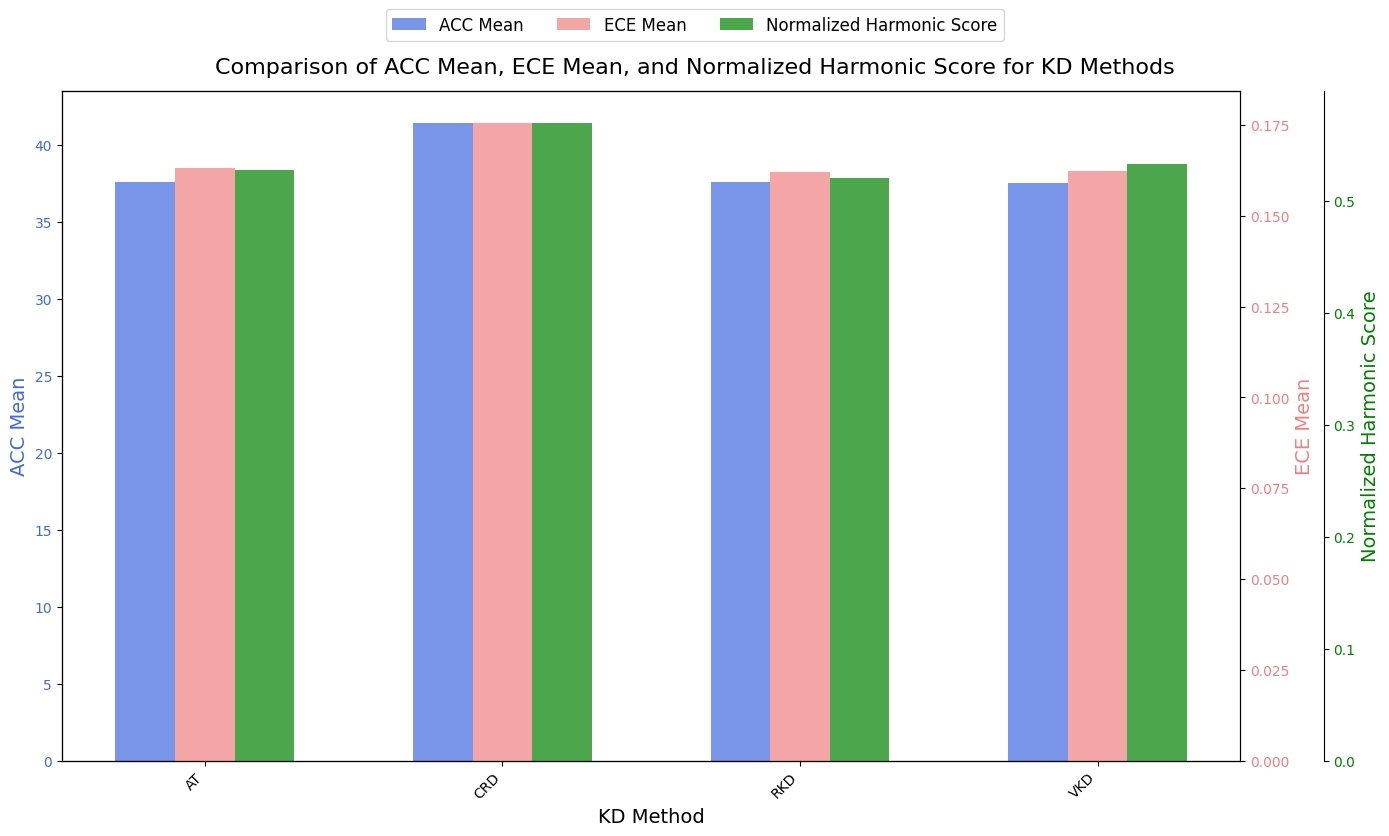

In [3]:
# 데이터 불러오기 및 초기 설정
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 파일 읽기
df = pd.read_csv("//home/iai/Desktop/son/capstone/classimbalance/cifar100-lt/imb_fact_100/total/results/experiment_results.txt", sep=", ", engine="python")

# 데이터 타입 변환
df["ACC Mean"] = df["ACC Mean"].astype(float)
df["ECE Mean"] = df["ECE Mean"].astype(float)

# KD 기법 목록
kd_methods = ['VKD', 'CRD', 'RKD', 'AT']

# 데이터 정규화
df["Normalized ACC"] = (df["ACC Mean"] - df["ACC Mean"].min()) / (df["ACC Mean"].max() - df["ACC Mean"].min())
df["Normalized ECE"] = (df["ECE Mean"] - df["ECE Mean"].min()) / (df["ECE Mean"].max() - df["ECE Mean"].min())

# 정규화된 조화평균 계산
df["Normalized Harmonic Score"] = 2 * (
    df["Normalized ACC"] * (1 - df["Normalized ECE"])
) / (df["Normalized ACC"] + (1 - df["Normalized ECE"]))

# KD 기법별 평균 계산
kd_avg = (
    df[df['KD Method'].isin(kd_methods)]
    .groupby("KD Method")[["ACC Mean", "ECE Mean", "Normalized Harmonic Score"]]
    .mean()
    .reset_index()
)

# KD 기법별 평균 출력
print(kd_avg.to_string(index=False))

# X축 위치 설정
x = np.arange(len(kd_avg["KD Method"]))
width = 0.2  # 막대의 너비

# 그래프 그리기
fig, ax1 = plt.subplots(figsize=(14, 8))

# 첫 번째 Y축 (ACC Mean)
bar1 = ax1.bar(
    x - width, 
    kd_avg["ACC Mean"], 
    width, 
    color='royalblue', 
    alpha=0.7, 
    label='ACC Mean'
)
ax1.set_xlabel('KD Method', fontsize=14)
ax1.set_ylabel('ACC Mean', fontsize=14, color='royalblue')
ax1.tick_params(axis='y', labelcolor='royalblue')
ax1.set_xticks(x)
ax1.set_xticklabels(kd_avg["KD Method"], rotation=45, ha='right')

# 두 번째 Y축 (ECE Mean)
ax2 = ax1.twinx()
bar2 = ax2.bar(
    x, 
    kd_avg["ECE Mean"], 
    width, 
    color='lightcoral', 
    alpha=0.7, 
    label='ECE Mean'
)
ax2.set_ylabel('ECE Mean', fontsize=14, color='lightcoral')
ax2.tick_params(axis='y', labelcolor='lightcoral')

# 세 번째 Y축 (Normalized Harmonic Score)
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # 세 번째 Y축 위치 조정
bar3 = ax3.bar(
    x + width, 
    kd_avg["Normalized Harmonic Score"], 
    width, 
    color='green', 
    alpha=0.7, 
    label='Normalized Harmonic Score'
)
ax3.set_ylabel('Normalized Harmonic Score', fontsize=14, color='green')
ax3.tick_params(axis='y', labelcolor='green')

# 범례 추가
bars = [bar1, bar2, bar3]
labels = [bar.get_label() for bar in bars]
fig.legend(bars, labels, loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=3, fontsize=12)

# 그래프 제목 및 레이아웃
fig.suptitle('Comparison of ACC Mean, ECE Mean, and Normalized Harmonic Score for KD Methods', fontsize=16)
fig.tight_layout()
plt.show()

In [4]:
# 조합별 그룹화 및 평균 계산
group_avg = df.groupby(['KD Method', 'Teacher Calibration', 'Student Calibration']).agg({
    'ACC Mean': 'mean',
    'ECE Mean': 'mean',
    'Normalized Harmonic Score': 'mean'
}).reset_index()

# 성능이 높은 상위 5개 조합
top_combinations = group_avg.nlargest(5, 'Normalized Harmonic Score')
print(top_combinations)

# 성능이 낮은 하위 5개 조합
bottom_combinations = group_avg.nsmallest(5, 'Normalized Harmonic Score')
print(bottom_combinations)


   KD Method Teacher Calibration Student Calibration  ACC Mean  ECE Mean  \
49       CRD                 TCP     BalancedSoftmax    41.310   0.15930   
58       CRD               TNone                  CE    41.260   0.16305   
48       CRD                 TCP                 ALS    41.325   0.16320   
33       CRD                TALS     BalancedSoftmax    41.600   0.16510   
52       CRD              TCP_MX                 ALS    40.655   0.16070   

    Normalized Harmonic Score  
49                   0.715638  
58                   0.686311  
48                   0.680960  
33                   0.673948  
52                   0.673036  
   KD Method Teacher Calibration Student Calibration  ACC Mean  ECE Mean  \
72       RKD                 TBS                 ALS    33.970   0.13935   
51       CRD                 TCP   ConfidencePenalty    42.270   0.19700   
92       RKD            TNone_MX                 ALS    35.175   0.15375   
20        AT              TCP_MX               

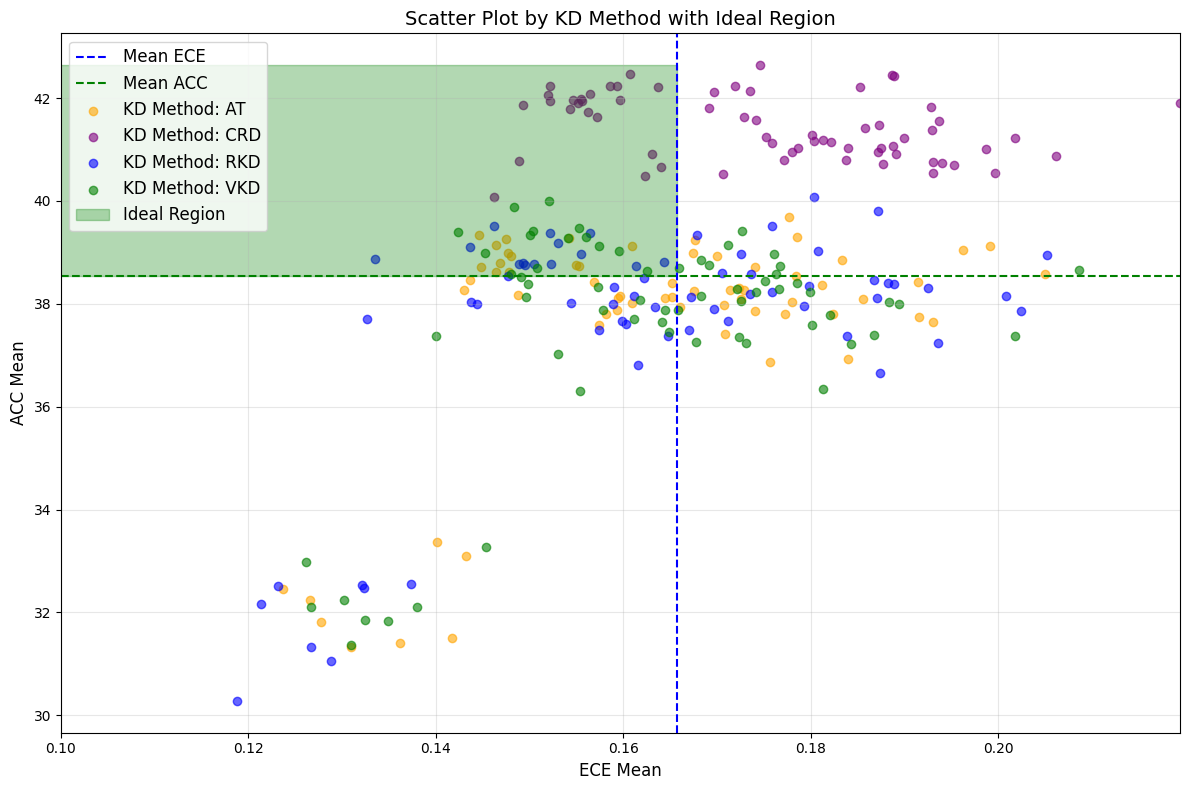

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# KD 기법 분리
kd_methods = ["AT", "CRD", "RKD", "VKD"]
colors = ["orange", "purple", "blue", "green"]

# KD 기법별로 데이터 표시
for kd_method, color in zip(kd_methods, colors):
    kd_data = df[df["KD Method"] == kd_method]
    plt.scatter(
        kd_data["ECE Mean"], 
        kd_data["ACC Mean"], 
        color=color, 
        alpha=0.6, 
        label=f"KD Method: {kd_method}"
    )

# 평균선
ece_mean = df["ECE Mean"].mean()
acc_mean = df["ACC Mean"].mean()
plt.axvline(ece_mean, color="blue", linestyle="--", linewidth=1.5, label="Mean ECE")
plt.axhline(acc_mean, color="green", linestyle="--", linewidth=1.5, label="Mean ACC")

# Ideal Region 표시 (ECE <= Mean ECE AND ACC >= Mean ACC)
plt.fill_betweenx(
    y=[acc_mean, df["ACC Mean"].max()],  # ACC 범위
    x1=0, x2=ece_mean,                  # ECE 범위
    color='green', alpha=0.3, label="Ideal Region"
)

# 그래프 설정
plt.title("Scatter Plot by KD Method with Ideal Region", fontsize=14)
plt.xlabel("ECE Mean", fontsize=12)
plt.ylabel("ACC Mean", fontsize=12)
plt.xlim(0.10, df["ECE Mean"].max())  # X축 범위 조정
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()

# 그래프 표시
plt.show()
